<a href="https://colab.research.google.com/github/atriap/atrria/blob/main/Persentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
df <- read.csv('Regularities_by_liaisons_Trains_France.csv')

In [ ]:
#verify data frame, count columns and rows
print(is.data.frame(df))
print(ncol(df))
print(nrow(df))

[1] TRUE
[1] 32
[1] 7806


In [ ]:
#change df to tibble
df <- as_tibble(df)

In [ ]:
#view imported data frame
View(df)


Year,Month,Departure.station,Arrival.station,Average.travel.time..min.,Number.of.expected.circulations,Number.of.cancelled.trains,Number.of.late.trains.at.departure,Average.delay.of.late.departing.trains..min.,Average.delay.of.all.departing.trains..min.,⋯,Average.train.delay...15min,Number.of.late.trains...30min,Number.of.late.trains...60min,Period,Delay.due.to.external.causes,Delay.due.to.railway.infrastructure,Delay.due.to.traffic.management,Delay.due.to.rolling.stock,Delay.due.to.station.management.and.reuse.of.material,Delay.due.to.travellers.taken.into.account
<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019,7,ANGOULEME,PARIS MONTPARNASSE,131.91498,247,0,191,3.576353,2.6782726,⋯,32.965873,7,2,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
2019,7,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.61157,242,0,178,9.780805,7.0336088,⋯,32.057143,14,2,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2019,7,LE MANS,PARIS MONTPARNASSE,62.39535,435,5,391,3.896974,3.5293411,⋯,42.367241,13,4,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
2019,7,ST MALO,PARIS MONTPARNASSE,172.42105,114,0,101,1.950990,1.6856725,⋯,27.620833,2,0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
2019,7,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.31000,404,4,284,8.379108,5.8031250,⋯,37.658333,12,3,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
2019,7,PARIS MONTPARNASSE,TOULOUSE MATABIAU,266.59474,190,0,123,4.765989,2.8877193,⋯,47.343452,13,4,2019-07,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000
2019,7,TOULOUSE MATABIAU,PARIS MONTPARNASSE,265.26289,194,0,86,5.124225,1.7146907,⋯,45.610920,13,4,2019-07,37.931034,27.586207,6.896552,20.689655,3.448276,3.448276
2019,7,PARIS EST,METZ,85.39938,323,0,239,10.278452,7.5524768,⋯,60.874405,16,11,2019-07,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000
2019,7,PARIS EST,REIMS,46.30556,222,6,190,4.985263,4.3618827,⋯,47.841667,11,5,2019-07,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000


In [ ]:
#columns names
print(colnames(df))

 [1] "Year"                                                                                                                
 [2] "Month"                                                                                                               
 [3] "Departure.station"                                                                                                   
 [4] "Arrival.station"                                                                                                     
 [5] "Average.travel.time..min."                                                                                           
 [6] "Number.of.expected.circulations"                                                                                     
 [7] "Number.of.cancelled.trains"                                                                                          
 [8] "Number.of.late.trains.at.departure"                                                                                  
 [9] "Av

In [ ]:
#rename columns
df <- df %>% 
  rename(year = Year, month = Month, departure_station = Departure.station, arrival_station = Arrival.station, travel_time_avg = Average.travel.time..min.,
         num_of_expected_trips = Number.of.expected.circulations, num_of_canceled_trains = Number.of.cancelled.trains, num_late_at_departure = Number.of.late.trains.at.departure,
         avg_delay_late_at_departure = Average.delay.of.late.departing.trains..min., avg_delay_all_departing = Average.delay.of.all.departing.trains..min.,
         comment_delays_at_departure = Comment..optional..delays.at.departure, num_arriving_late = Number.of.trains.late.on.arrival,
         avg_delay_late_on_arrival = Average.delay.of.late.arriving.trains..min., avg_delay_all_arriving = Average.delay.of.all.arriving.trains..min.,
         comment_delays_on_arrival = Comment..optional..delays.on.arrival,
         delay_cause_external_cause = X..trains.late.due.to.external.causes..weather..obstacles..suspicious.packages..malevolence..social.movements..etc..,
         delay_cause_rail_infrastructure = X..trains.late.due.to.railway.infrastructure..maintenance..works.,
         delay_cause_traffic_management = X..trains.late.due.to.traffic.management..rail.line.traffic..network.interactions.,
         delay_cause_rolling_stock = X..trains.late.due.to.rolling.stock,
         delay_cause_station_management = X..trains.late.due.to.station.management.and.reuse.of.material,
         delay_cause_travelers = X..trains.late.due.to.passenger.traffic..affluence..PSH.management..connections.,
         num_greater_15_min_late = Number.of.late.trains...15min, avg_delay_late_greater_15_min = Average.train.delay...15min,
         num_greater_30_min_late = Number.of.late.trains...30min, num_greater_60_min_late = Number.of.late.trains...60min)



In [ ]:
#columns names
print(colnames(df))

 [1] "year"                                                 
 [2] "month"                                                
 [3] "departure_station"                                    
 [4] "arrival_station"                                      
 [5] "travel_time_avg"                                      
 [6] "num_of_expected_trips"                                
 [7] "num_of_canceled_trains"                               
 [8] "num_late_at_departure"                                
 [9] "avg_delay_late_at_departure"                          
[10] "avg_delay_all_departing"                              
[11] "comment_delays_at_departure"                          
[12] "num_arriving_late"                                    
[13] "avg_delay_late_on_arrival"                            
[14] "avg_delay_all_arriving"                               
[15] "comment_delays_on_arrival"                            
[16] "delay_cause_external_cause"                           
[17] "delay_cause_rail_i

In [ ]:
#delay cause columns comparison
df[c(16:21, 27:32)]

delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,Delay.due.to.external.causes,Delay.due.to.railway.infrastructure,Delay.due.to.traffic.management,Delay.due.to.rolling.stock,Delay.due.to.station.management.and.reuse.of.material,Delay.due.to.travellers.taken.into.account
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.25000000,0.15000000,0.27500000,0.12500000,0.02500000,0.17500000,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
0.20000000,0.24444444,0.26666667,0.24444444,0.00000000,0.04444444,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
0.16176471,0.32352941,0.26470588,0.14705882,0.02941176,0.07352941,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
0.15384615,0.15384615,0.23076923,0.38461538,0.00000000,0.07692308,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
0.18461538,0.12307692,0.40000000,0.16923077,0.07692308,0.04615385,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
0.25925926,0.33333333,0.22222222,0.18518519,0.00000000,0.00000000,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000
0.37931034,0.27586207,0.06896552,0.20689655,0.03448276,0.03448276,37.931034,27.586207,6.896552,20.689655,3.448276,3.448276
0.24000000,0.18000000,0.16000000,0.26000000,0.16000000,0.00000000,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000
0.32352941,0.14705882,0.17647059,0.23529412,0.11764706,0.00000000,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000


In [ ]:
#remove redundant columns, define to new dataframe
trains_df <- df %>% 
  select(year:num_greater_60_min_late)

In [ ]:
print(ncol(trains_df))
print(nrow(trains_df))

[1] 25
[1] 7806


In [ ]:
#sort data frame by year, month
trains_df = trains_df %>%
  arrange(year,month)


In [ ]:
print(colnames(trains_df))
trains_df

 [1] "year"                            "month"                          
 [3] "departure_station"               "arrival_station"                
 [5] "travel_time_avg"                 "num_of_expected_trips"          
 [7] "num_of_canceled_trains"          "num_late_at_departure"          
 [9] "avg_delay_late_at_departure"     "avg_delay_all_departing"        
[11] "comment_delays_at_departure"     "num_arriving_late"              
[13] "avg_delay_late_on_arrival"       "avg_delay_all_arriving"         
[15] "comment_delays_on_arrival"       "delay_cause_external_cause"     
[17] "delay_cause_rail_infrastructure" "delay_cause_traffic_management" 
[19] "delay_cause_rolling_stock"       "delay_cause_station_management" 
[21] "delay_cause_travelers"           "num_greater_15_min_late"        
[23] "avg_delay_late_greater_15_min"   "num_greater_30_min_late"        
[25] "num_greater_60_min_late"        


year,month,departure_station,arrival_station,travel_time_avg,num_of_expected_trips,num_of_canceled_trains,num_late_at_departure,avg_delay_late_at_departure,avg_delay_all_departing,⋯,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers,num_greater_15_min_late,avg_delay_late_greater_15_min,num_greater_30_min_late,num_greater_60_min_late
<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,1,PARIS LYON,NIMES,177.90596,320,1,18,17.05556,1.1222571,⋯,0.41935484,0.19354839,0.12903226,0.09677419,0.12903226,0.03225806,22,44.04545,12,6
2015,1,PARIS EST,REIMS,47.17371,213,0,12,18.08333,1.1784038,⋯,0.11764706,0.17647059,0.23529412,0.23529412,0.11764706,0.11764706,6,28.83333,2,0
2015,1,LA ROCHELLE VILLE,PARIS MONTPARNASSE,192.34928,210,1,3,33.00000,0.5023923,⋯,0.14285714,0.71428571,0.14285714,0.00000000,0.00000000,0.00000000,9,54.00000,5,4
2015,1,PARIS MONTPARNASSE,VANNES,200.58239,177,1,3,13.00000,0.4886364,⋯,0.44444444,0.33333333,0.11111111,0.00000000,0.11111111,0.00000000,9,25.66667,2,0
2015,1,NANTES,STRASBOURG,327.03846,39,0,0,0.00000,0.5384615,⋯,0.66666667,0.00000000,0.00000000,0.33333333,0.00000000,0.00000000,3,46.66667,3,0
2015,1,PARIS MONTPARNASSE,TOURS,74.61714,175,0,3,42.00000,0.8971429,⋯,0.22222222,0.27777778,0.11111111,0.11111111,0.16666667,0.11111111,4,45.00000,3,1
2015,1,PARIS LYON,ANNECY,222.42357,159,2,3,55.00000,1.1974522,⋯,0.60000000,0.10000000,0.20000000,0.10000000,0.00000000,0.00000000,10,55.10000,8,2
2015,1,PARIS LYON,ITALIE,259.62069,87,0,4,13.25000,0.8965517,⋯,0.04597701,0.04597701,0.00000000,0.01149425,0.00000000,0.03448276,13,28.38462,3,1
2015,1,PARIS LYON,LAUSANNE,178.40171,117,0,9,21.44444,1.7521368,⋯,NA,NA,NA,NA,NA,NA,10,39.30000,6,2


In [ ]:
#count number of NA in each columns
na_count = data.frame(na_sum = colSums(is.na(trains_df))) %>%
  arrange(desc(na_sum))

In [ ]:
na_count %>% 
  filter(na_sum != 0)

,na_sum
,<dbl>
comment_delays_at_departure,7806
delay_cause_external_cause,271
delay_cause_rail_infrastructure,271
delay_cause_traffic_management,271
delay_cause_rolling_stock,271
delay_cause_station_management,271
delay_cause_travelers,271
avg_delay_late_greater_15_min,107
avg_delay_late_on_arrival,101


In [ ]:
#count unique observations in several columns
unique(trains_df[c("departure_station")])

departure_station
<chr>
PARIS LYON
PARIS EST
LA ROCHELLE VILLE
PARIS MONTPARNASSE
NANTES
NANCY
LYON PART DIEU
MONTPELLIER
PARIS NORD


In [ ]:
trains_df %>%
  count(departure_station) %>%
  arrange(desc(n))

departure_station,n
<chr>,<int>
PARIS LYON,1614
PARIS MONTPARNASSE,1056
PARIS EST,396
LYON PART DIEU,360
MARSEILLE ST CHARLES,288
PARIS NORD,264
LILLE,198
NANTES,144
RENNES,144


In [ ]:
View(trains_df %>%
  count(departure_station) %>%
  arrange(desc(n)))


departure_station,n
<chr>,<int>
PARIS LYON,1614
PARIS MONTPARNASSE,1056
PARIS EST,396
LYON PART DIEU,360
MARSEILLE ST CHARLES,288
PARIS NORD,264
LILLE,198
NANTES,144
RENNES,144


In [ ]:
#add new columns to data frame: total trips, late at departure rate, canceled trains rate
trains_df = trains_df %>%
  mutate(total_num_trips = num_of_expected_trips - num_of_canceled_trains,
         pct_late_departure = num_late_at_departure/total_num_trips,
         pct_late_arrival = num_arriving_late/total_num_trips,
         mean_monthly_pct_cancelled = num_of_canceled_trains/total_num_trips)

In [ ]:
#which station has the most number of trips
trains_df %>%
  group_by(departure_station) %>%
  summarise(total_trip = sum(total_num_trips, na.rm = TRUE)) %>%
  arrange(desc(total_trip))

departure_station,total_trip
<chr>,<dbl>
PARIS LYON,387279
PARIS MONTPARNASSE,330277
LYON PART DIEU,114385
PARIS EST,95346
PARIS NORD,79599
MARSEILLE ST CHARLES,77288
LILLE,63095
BORDEAUX ST JEAN,46561
RENNES,41760


In [ ]:
#number of trips and cancelled trips by year
trains_df %>%
  group_by(year) %>%
  summarise(total_trip = sum(total_num_trips, na.rm = TRUE))

year,total_trip
<int>,<dbl>
2015,387328
2016,367601
2017,387926
2018,383053
2019,368835
2020,107579


In [ ]:
trains_df %>%
  group_by(year) %>%
  summarise(total_canceled = sum(num_of_canceled_trains, na.rm = TRUE))

year,total_canceled
<int>,<dbl>
2015,927
2016,6219
2017,3828
2018,31600
2019,9955
2020,9228


In [ ]:
#delay cause by year
View(trains_df %>%
  group_by(year) %>%
  summarise(across(starts_with("delay"), mean, na.rm = TRUE)))

year,delay_cause_external_cause,delay_cause_rail_infrastructure,delay_cause_traffic_management,delay_cause_rolling_stock,delay_cause_station_management,delay_cause_travelers
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,0.3027807,0.2613755,0.1564827,0.1492054,0.08242864,0.04365385
2016,0.3003792,0.2646565,0.1651233,0.1356904,0.09354077,0.04060979
2017,0.2536852,0.2466274,0.2051340,0.2107545,0.05140042,0.03239840
2018,0.2579165,0.2300310,0.2082457,0.2173659,0.05399004,0.03245076
2019,0.2531140,0.2299333,0.2305883,0.1901622,0.06360667,0.03259561
2020,0.2093749,0.3549066,0.1643911,0.1706528,0.06083769,0.03983683


In [ ]:
#average late by year
trains_df %>%
  group_by(year) %>%
  summarise(rate_departure_late = mean(pct_late_departure, na.rm = TRUE))


year,rate_departure_late
<int>,<dbl>
2015,0.09269239
2016,0.10805901
2017,0.12070007
2018,0.28247548
2019,0.50694401
2020,0.65777718


In [ ]:
trains_df %>%
  group_by(year) %>%
  summarise(rate_arrival_late = mean(pct_late_arrival, na.rm = TRUE))

year,rate_arrival_late
<int>,<dbl>
2015,0.1096721
2016,0.1190798
2017,0.1532468
2018,0.1811352
2019,0.1456624
2020,0.1492763


In [ ]:
#define date
Sys.setlocale("LC_TIME", "C")
trains_df = trains_df %>%
  mutate(date = as.Date(sprintf("%d-%02d-01",year,month)))

[1] "C"

#Data Visualisation

In [ ]:
#install.packages("scales")
library(scales)

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



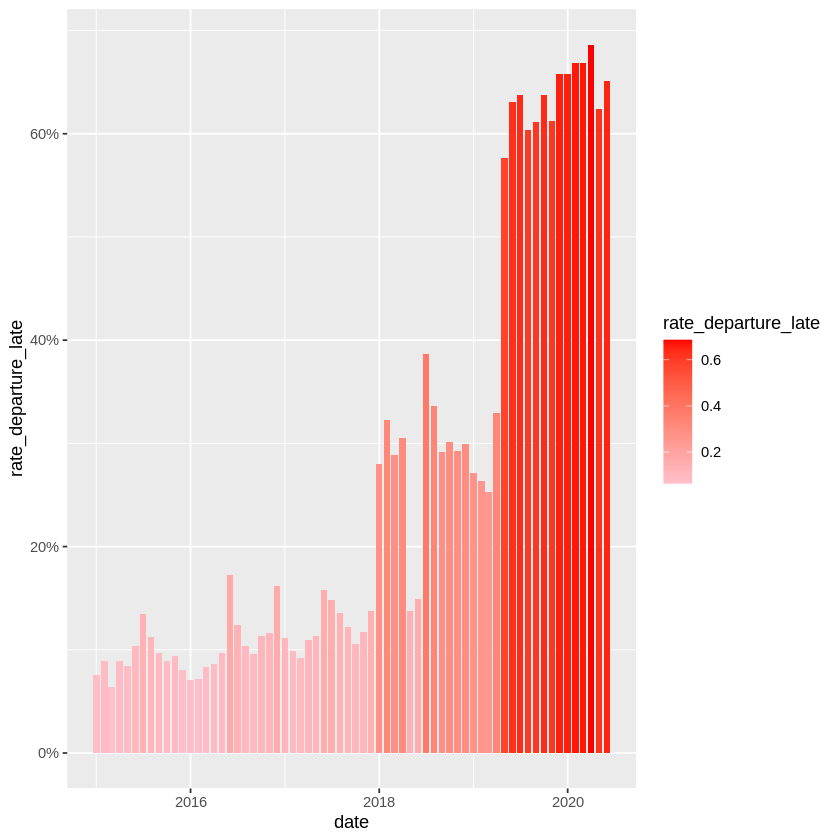

In [ ]:
#visualization of average late
trains_df %>%
  group_by(year, date) %>%
  summarise(rate_departure_late = mean(pct_late_departure, na.rm = TRUE)) %>% 
  ungroup() %>% 
  ggplot(aes(date,rate_departure_late,fill = rate_departure_late)) +
  scale_fill_gradient(low = "pink", high = "red") + 
  scale_y_continuous(labels = percent_format()) +
  geom_bar(stat = "identity")

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



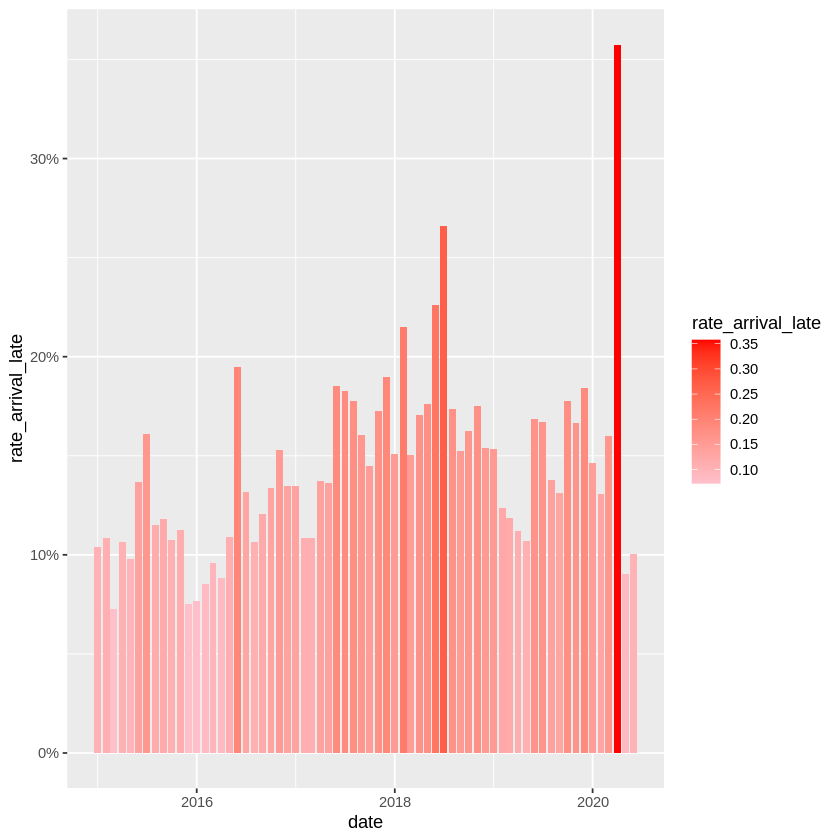

In [ ]:
#average late at arrival rate
  trains_df %>%
  group_by(year, date) %>%
  summarise(rate_arrival_late = mean(pct_late_arrival, na.rm = TRUE)) %>% 
  ungroup() %>% 
  ggplot(aes(date,rate_arrival_late,fill = rate_arrival_late)) +
  scale_fill_gradient(low = "pink", high = "red") + 
  scale_y_continuous(labels = percent_format()) +
  geom_bar(stat = "identity")

Warning message:
“Removed 3 row(s) containing missing values (geom_path).”


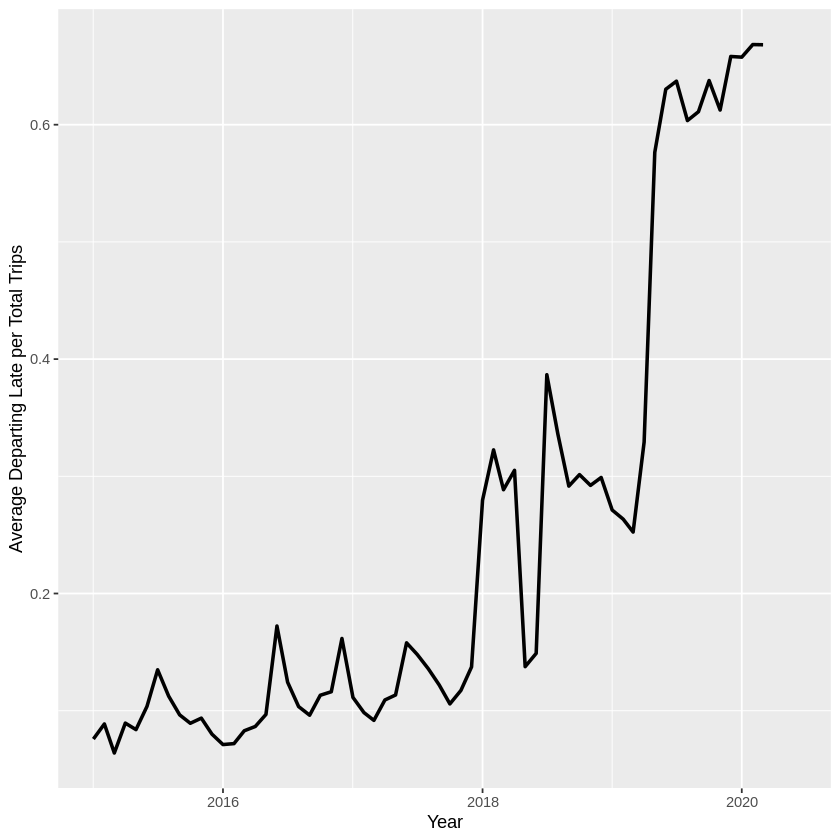

In [ ]:
#average late at departure visualized
trains_df %>%  
  group_by(date) %>%
  summarise(mean_monthly_pct_late_departure = mean(pct_late_departure)) %>%
  ggplot(aes(x = date, y = mean_monthly_pct_late_departure)) +
  geom_line(size = 1) +
  xlab("Year") +
  ylab("Average Departing Late per Total Trips")

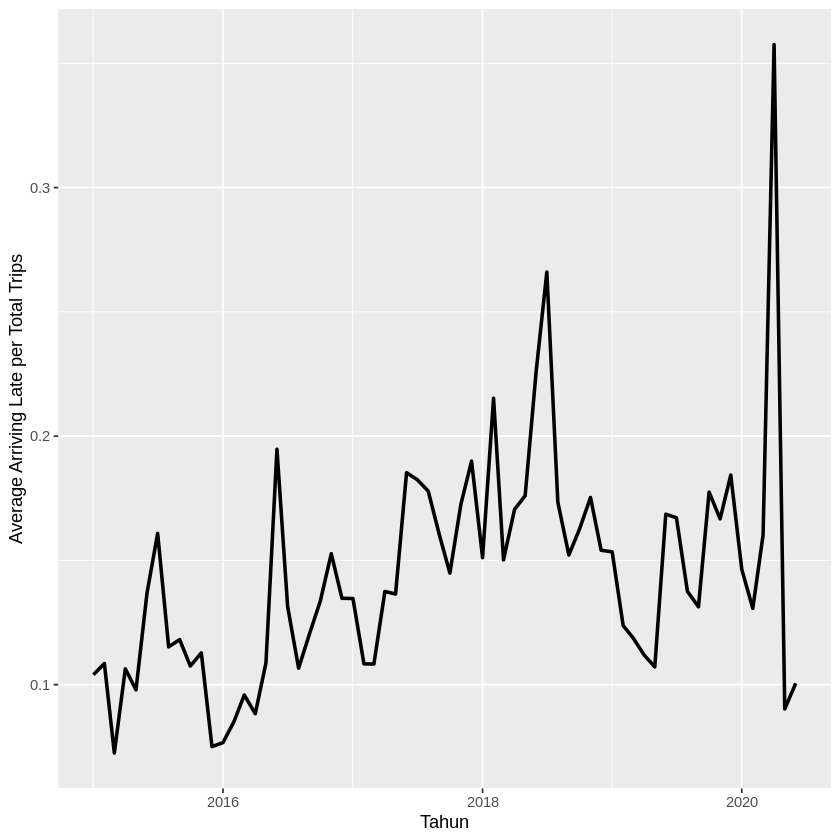

In [ ]:
#average late at arrival visualized
trains_df %>%  
  group_by(date) %>%
  summarise(mean_monthly_pct_late_arrival = mean(pct_late_arrival, na.rm = TRUE)) %>%
  ggplot(aes(x = date, y = mean_monthly_pct_late_arrival)) +
  geom_line(size = 1) +
  xlab("Tahun") +
  ylab("Average Arriving Late per Total Trips")

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



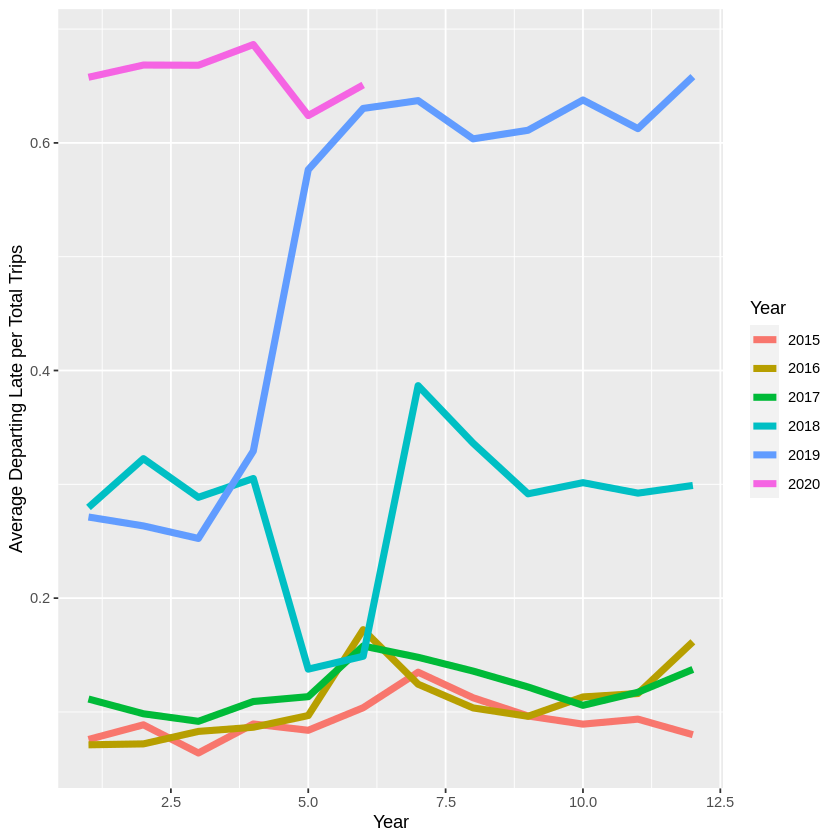

In [ ]:
#average late at departure per month per years compared
trains_df %>%
  group_by(year,month) %>%
  summarise(monthly_pct_late_departure = mean(pct_late_departure, na.rm = TRUE)) %>% 
  ggplot(aes(x = month, y = monthly_pct_late_departure, color = factor(year))) +
  geom_line(size = 2) +
  labs(color = "Year") +
  xlab("Year") +
  ylab("Average Departing Late per Total Trips")

`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



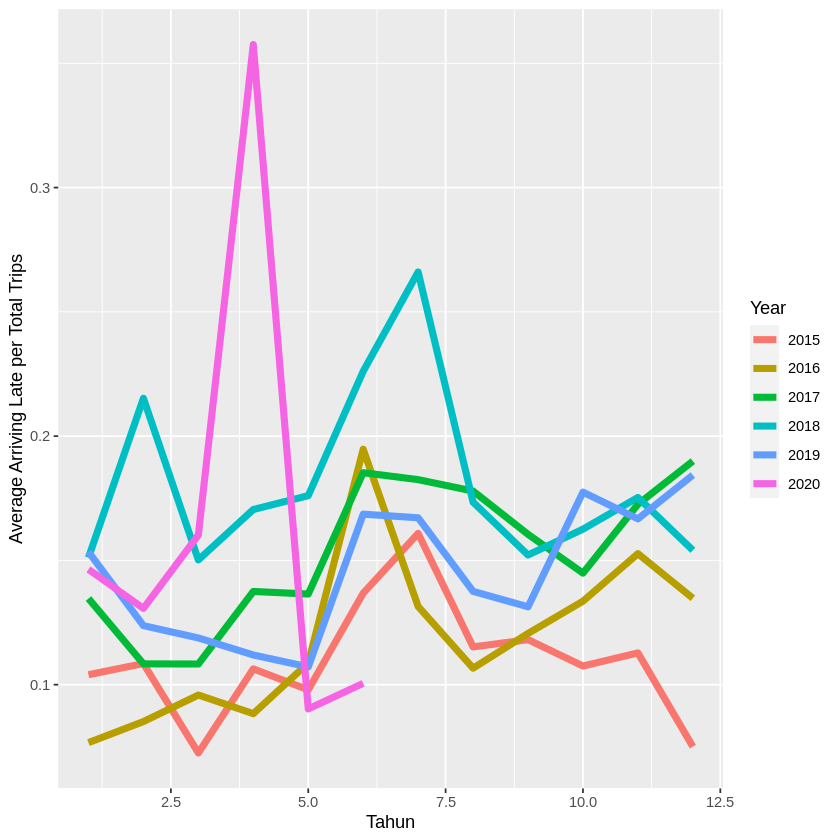

In [ ]:
#average late at arrival per month per years compared
trains_df %>%
  group_by(year,month) %>%
  summarise(monthly_pct_late_arrival = mean(pct_late_arrival, na.rm = TRUE)) %>% 
  ggplot(aes(x = month, y = monthly_pct_late_arrival, color = factor(year))) +
  geom_line(size = 2) +
  labs(color = "Year") +
  xlab("Tahun") +
  ylab("Average Arriving Late per Total Trips")


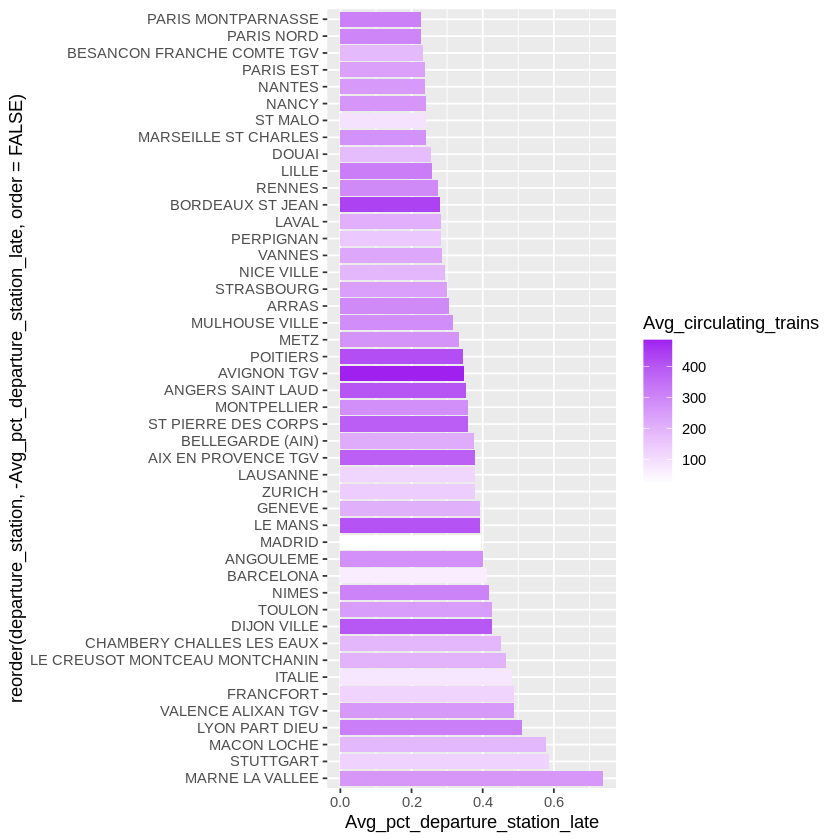

In [ ]:
#visualization of departure late in each station
trains_df %>% 
  group_by(departure_station) %>% 
  summarise(Avg_pct_departure_station_late = mean(pct_late_departure, na.rm = TRUE),
            Avg_circulating_trains = mean(total_num_trips, na.rm = TRUE)) %>% 
  arrange(desc(Avg_pct_departure_station_late)) %>% 
  filter(Avg_pct_departure_station_late > 0.2) %>% 
  ggplot(aes(x = reorder(departure_station, -Avg_pct_departure_station_late,order = FALSE),
             y = Avg_pct_departure_station_late,fill = Avg_circulating_trains)) +
  scale_fill_gradient(low = 'white', high = 'purple') +
  geom_bar(stat = "identity") +
  coord_flip()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.



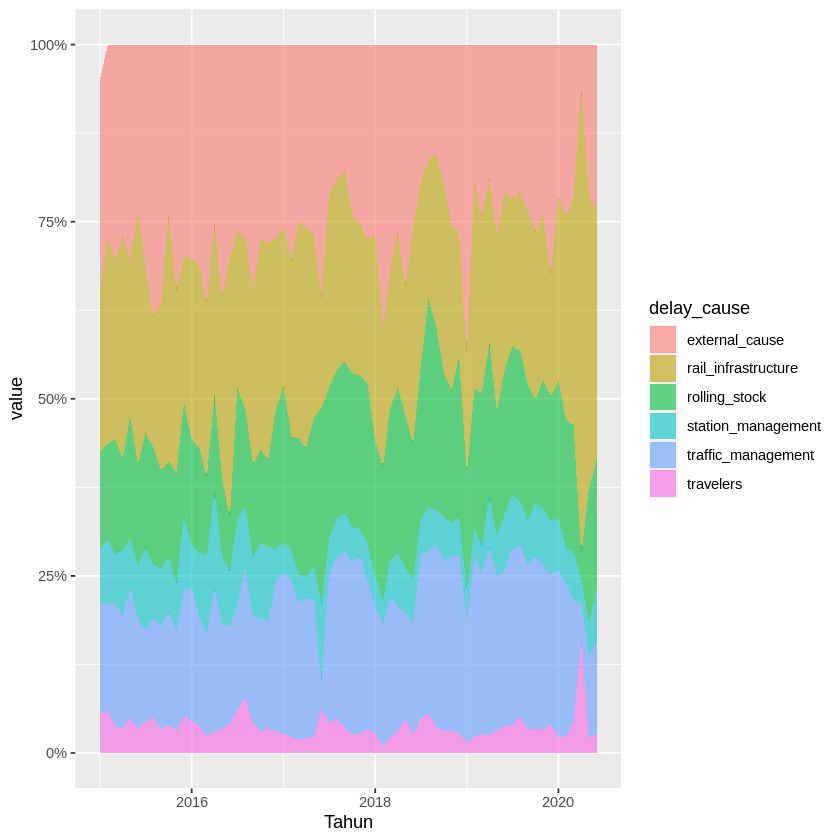

In [ ]:
#causes of departing late
trains_df %>%  
  group_by(year,month) %>% 
  summarise(across(starts_with("delay"), mean, na.rm = TRUE)) %>%  
  mutate(date = as.Date(sprintf("%d-%02d-01",year,month))) %>% 
  pivot_longer(cols = starts_with("delay"),names_to = "delay") %>%
  mutate(delay = substring(delay,nchar("delay_cause_") + 1)) %>% 
  rename(delay_cause = delay) %>% 
  ggplot(aes(date,value,fill = delay_cause)) +
  geom_area(alpha = 0.6) +
  xlab("Tahun") +
  scale_y_continuous(labels = percent_format())


